# Network_Traffic_Prediction

Mounting google drive

In [77]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data loading

In [79]:
import pandas as pd
data = pd.read_csv('network_traffic_prediction.csv')

data.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


# Data Preprocessing

Convert IP addresses to categorical

In [80]:
# Convert IP addresses to categorical
data['src_ip'] = data['src_ip'].astype('category')
data['dst_ip'] = data['dst_ip'].astype('category')

General data information

In [81]:
# data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   src_ip                  211043 non-null  category
 1   src_port                211043 non-null  int64   
 2   dst_ip                  211043 non-null  category
 3   dst_port                211043 non-null  int64   
 4   proto                   211043 non-null  object  
 5   service                 211043 non-null  object  
 6   duration                211043 non-null  float64 
 7   src_bytes               211043 non-null  int64   
 8   dst_bytes               211043 non-null  int64   
 9   conn_state              211043 non-null  object  
 10  missed_bytes            211043 non-null  int64   
 11  src_pkts                211043 non-null  int64   
 12  src_ip_bytes            211043 non-null  int64   
 13  dst_pkts                211043 non-null  int64   
 14  dst_

Checking and removing missing values

In [82]:
# Check for any missing values and fill or drop
data = data.fillna(method='ffill')

<ipython-input-82-67832fa23d28>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [83]:
# printing missing values after imputation
missing_values = data.isnull().sum()
print(missing_values)

src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_len    0
http_status_code    

In [84]:
# displaying top 5 rows data
data.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


Outliers dection and removal

In [85]:
# Removing outliers in 'duration'
q_low = data['duration'].quantile(0.01)
q_hi  = data['duration'].quantile(0.99)
data = data[(data['duration'] > q_low) & (data['duration'] < q_hi)]

# EDA exploratory data analysis

### Descriptive statistics

In [86]:
data.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,148919.000000,148919.000000,148919.000000,1.489190e+05,1.489190e+05,1.489190e+05,148919.00000,1.489190e+05,148919.000000,1.489190e+05,148919.000000,148919.000000,148919.000000,148919.000000,1.489190e+05,148919.000000,148919.000000
mean,37787.562098,1332.329857,2.938545,1.870687e+04,3.550329e+03,2.365423e+03,12.04162,7.094851e+02,2.838355,1.291110e+03,317.942707,4.313036,0.172745,0.084368,1.982657e+02,0.416468,0.751194
std,20232.055481,4744.047377,12.223528,5.052478e+06,2.620758e+05,2.445093e+05,55.09265,7.204945e+03,51.836052,2.419927e+04,3211.106479,25.911228,0.700869,10.522555,3.617384e+04,9.679063,0.432323
min,1.000000,0.000000,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,34486.000000,53.000000,0.000124,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,4.800000e+01,1.000000,4.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,45608.000000,80.000000,0.002745,0.000000e+00,0.000000e+00,0.000000e+00,2.00000,1.300000e+02,1.000000,6.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,50936.000000,90.000000,0.215649,1.540000e+02,5.010000e+02,0.000000e+00,5.00000,4.580000e+02,4.000000,6.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,65528.000000,65467.000000,117.884411,1.430386e+09,6.700192e+07,6.145087e+07,8066.00000,2.259932e+06,18722.000000,5.925855e+06,32769.000000,255.000000,5.000000,2338.000000,1.342438e+07,404.000000,1.000000


### Distribution of Connection States

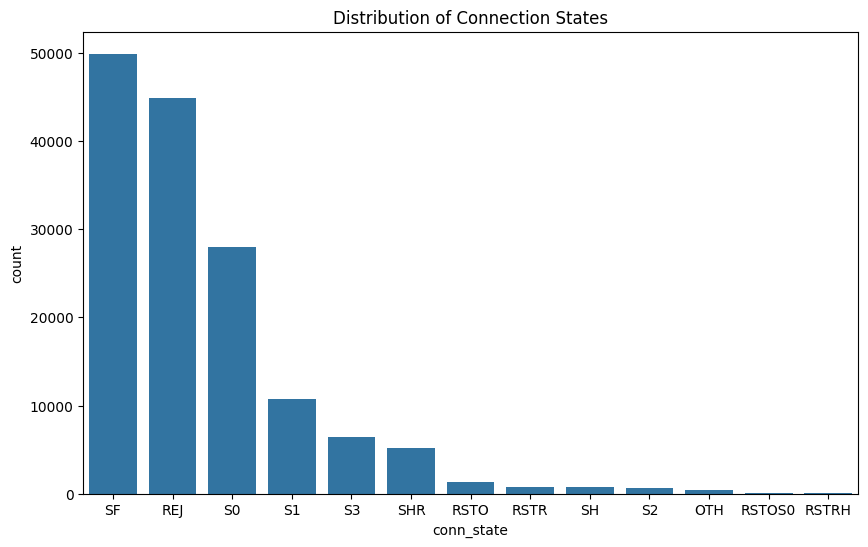

In [87]:
# Distribution of Connection States
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='conn_state', order=data['conn_state'].value_counts().index)
plt.title('Distribution of Connection States')
plt.show()

### Distribution of Traffic Types

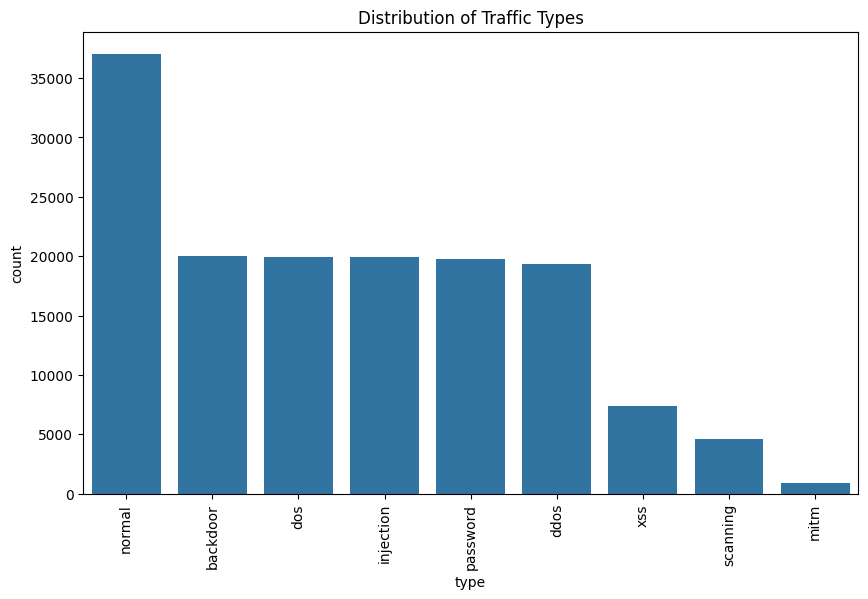

In [88]:
# Distribution of Traffic Types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', order=data['type'].value_counts().index)
plt.title('Distribution of Traffic Types')
plt.xticks(rotation=90)
plt.show()

### Duration vs Destination Bytes by Protoco

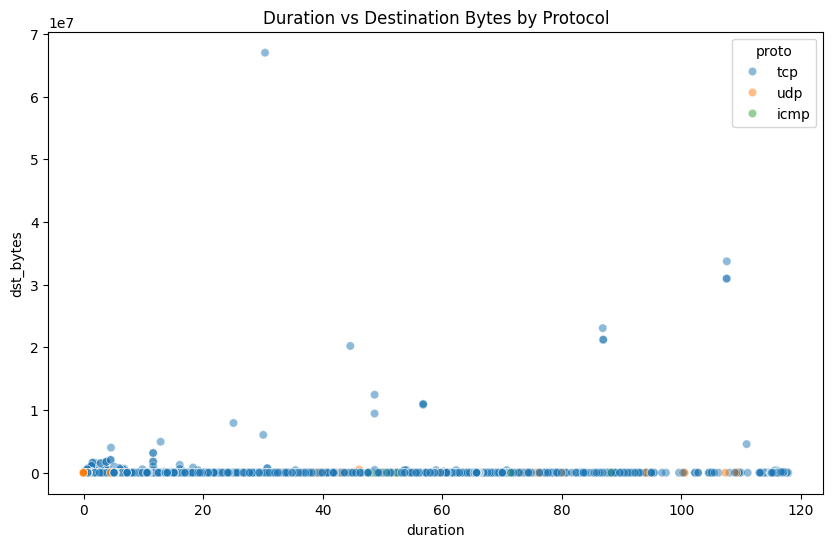

In [89]:
# Duration vs Destination Bytes by Protoco
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['duration'], y=data['dst_bytes'], hue=data['proto'], alpha=0.5)
plt.title('Duration vs Destination Bytes by Protocol')
plt.show()

### Distribution of DNS Query Types

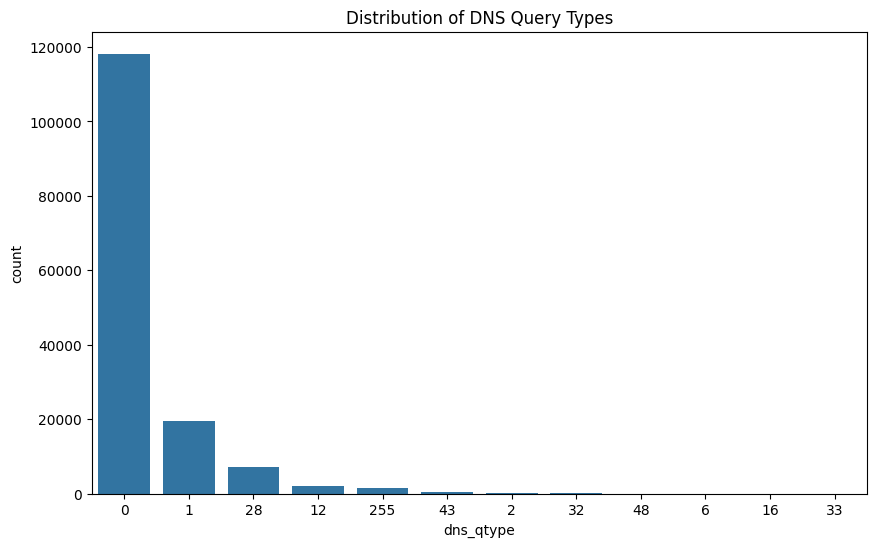

In [90]:
# Distribution of DNS Query Types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dns_qtype', order=data['dns_qtype'].value_counts().index)
plt.title('Distribution of DNS Query Types')
plt.show()

### Distribution of Labels

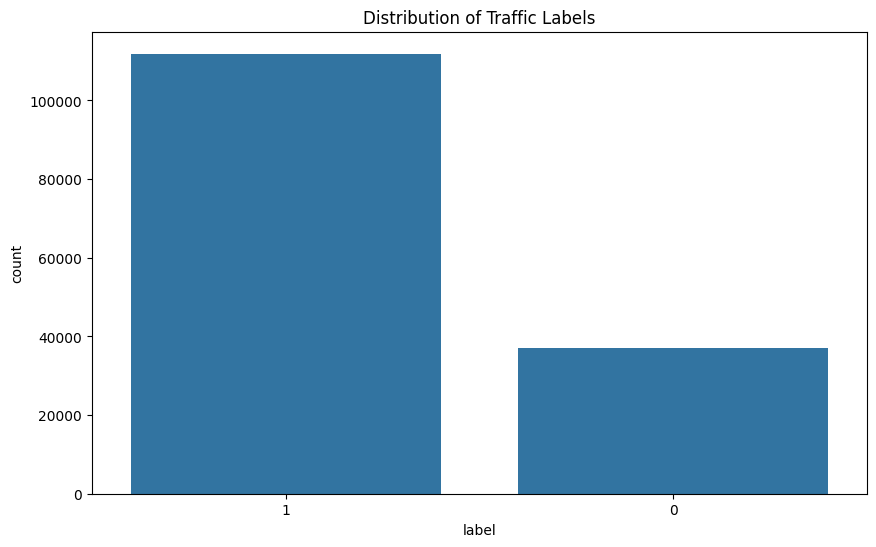

In [91]:
# Distribution of Labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label', order=data['label'].value_counts().index)
plt.title('Distribution of Traffic Labels')
plt.show()

### Traffic Types by Label

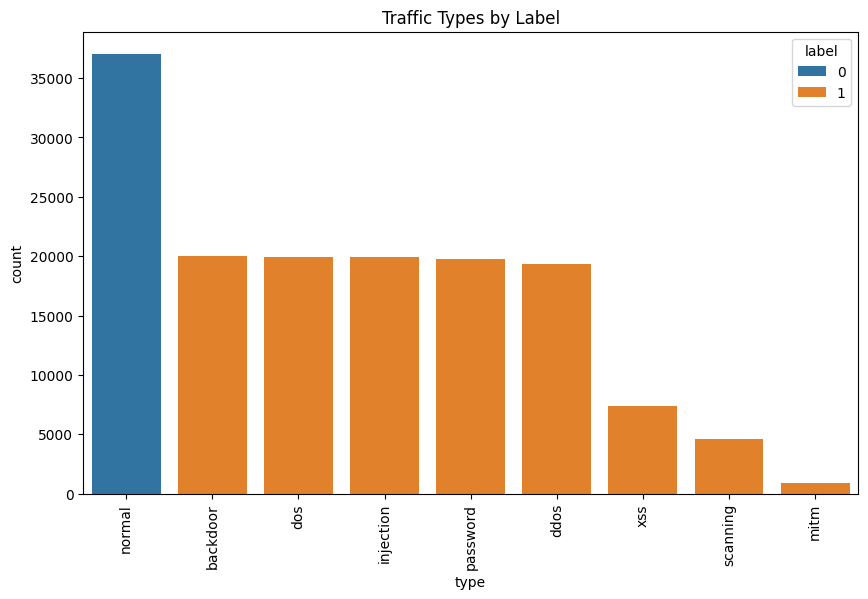

In [92]:
# If 'label' indicates normal vs. abnormal traffic, explore this more by cross-tabulating with 'type'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='label', order=data['type'].value_counts().index)
plt.title('Traffic Types by Label')
plt.xticks(rotation=90)
plt.show()

### Correlation Matrix of Features

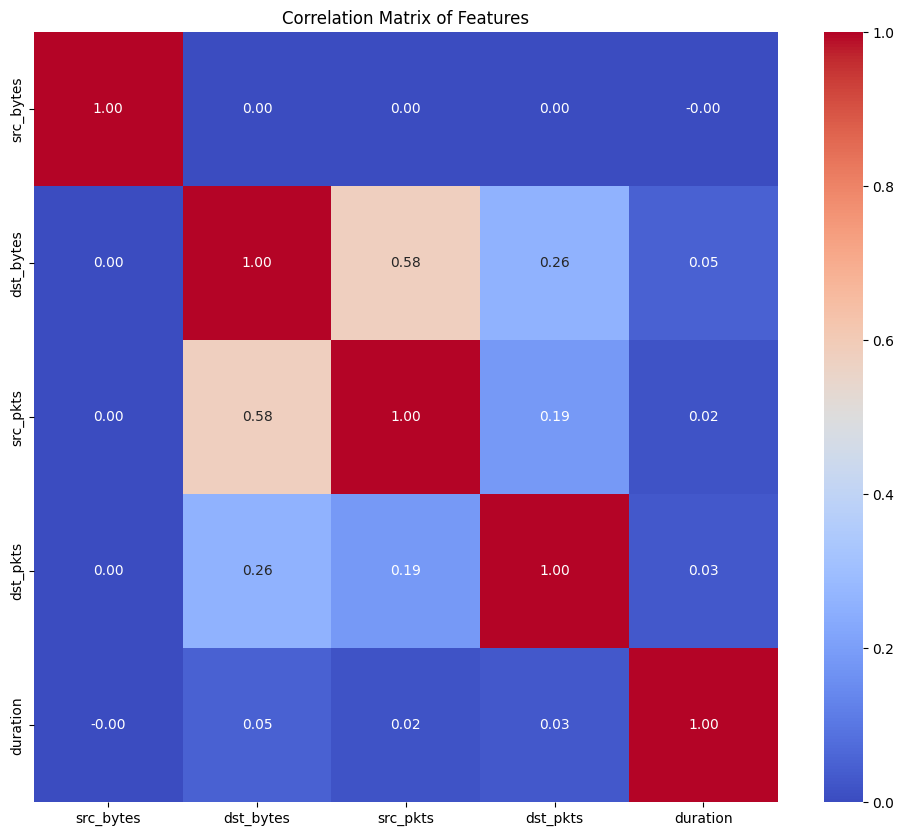

In [93]:
numerical_features = ['src_bytes', 'dst_bytes', 'src_pkts', 'dst_pkts']

# Calculate correlation matrix
correlation_matrix = data[numerical_features + ['duration']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


# Models Development and Training

## 1. Total flow duration Prediction

### Feature engineering

In [144]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize encoder and scaler
encoder = LabelEncoder()
scaler = StandardScaler()

# Encode categorical features
data['proto_encoded'] = encoder.fit_transform(data['proto'])
data['service_encoded'] = encoder.fit_transform(data['service'])
data['conn_state_encoded'] = encoder.fit_transform(data['conn_state'])

# Selecting numerical features to scale
numerical_features = ['src_bytes', 'dst_bytes', 'src_pkts', 'dst_pkts', 'src_ip_bytes', 'dst_ip_bytes']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Selecting relevant features for the model
features = numerical_features + ['proto_encoded', 'service_encoded', 'conn_state_encoded']
target = 'duration'

### Data spliting

In [145]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


### i). KNN (KNeighborsRegressor)


In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN Regressor
knn_reg = KNeighborsRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on testing data
y_pred_knn = best_knn.predict(X_test)

# Evaluation metrics
mse_knn1 = mean_squared_error(y_test, y_pred_knn)
mae_knn1 = mean_absolute_error(y_test, y_pred_knn)
rmse_knn1 = np.sqrt(mse_knn1)
r2_knn1 = r2_score(y_test, y_pred_knn)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}


In [147]:
# Print each metric in steps
print("KNN Regression Evaluation Metrics:")
print("KNN R2:", format(r2_knn1, ".3f"))
print("KNN MSE:", format(rmse_knn1, ".3f"))
print("KNN MAE:", format(mae_knn1, ".3f"))
print("KNN RMSE:", format(rmse_knn1, ".3f"))

KNN Regression Evaluation Metrics:
KNN R2: 0.874
KNN MSE: 4.388
KNN MAE: 0.595
KNN RMSE: 4.388


### ii). RandomForestRegressor

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation metrics
mse_rf1 = mean_squared_error(y_test, y_pred_rf)
mae_rf1 = mean_absolute_error(y_test, y_pred_rf)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_test, y_pred_rf)

In [150]:
# Print each metric in steps
print("Random Forest Regression Evaluation Metrics:")
print("Random Forest R2:", format(r2_rf1, ".3f"))
print("Random Forest MSE:", format(mse_rf1, ".3f"))
print("Random Forest MAE:", format(mae_rf1, ".3f"))
print("Random Forest RMSE:", format(rmse_rf1, ".3f"))

Random Forest Regression Evaluation Metrics:
Random Forest R2: 0.905
Random Forest MSE: 14.509
Random Forest MAE: 0.577
Random Forest RMSE: 3.809


### iii). ExtraTreesRegressor

In [152]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Initialize and train the Extra Trees model
et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train, y_train)
y_pred_et = et_reg.predict(X_test)

# Evaluation metrics
mse_et1 = mean_squared_error(y_test, y_pred_et)
mae_et1 = mean_absolute_error(y_test, y_pred_et)
rmse_et1 = np.sqrt(mse_et1)
r2_et1 = r2_score(y_test, y_pred_et)

In [153]:
# Print each metric in steps
print("ExtraTreesRegressor Evaluation Metrics:")
print("ExtraTreesRegressor R2:", format(r2_et1, ".3f"))
print("ExtraTreesRegressor MSE:", format(mse_et1, ".3f"))
print("ExtraTreesRegressor MAE:", format(mae_et1, ".3f"))
print("ExtraTreesRegressor RMSE:", format(rmse_et1, ".3f"))

ExtraTreesRegressor Evaluation Metrics:
ExtraTreesRegressor R2: 0.907
ExtraTreesRegressor MSE: 14.243
ExtraTreesRegressor MAE: 0.548
ExtraTreesRegressor RMSE: 3.774


### iv). ResNet

In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and include validation split
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predict on training and validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_train[-int(len(X_train) * 0.2):])  # Assuming last 20% is validation

# Calculate R2 scores
r2_train = r2_score(y_train, y_pred_train)
r2_val1 = r2_score(y_train[-int(len(y_train) * 0.2):], y_pred_val)

# Calculate MSE and MAE
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_val1 = mean_squared_error(y_train[-int(len(y_train) * 0.2):], y_pred_val)
mae_val1 = mean_absolute_error(y_train[-int(len(y_train) * 0.2):], y_pred_val)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2979/2979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 131.5822 - mae: 4.2625 - val_loss: 102.0968 - val_mae: 3.6178
Epoch 2/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 109.8040 - mae: 4.0850 - val_loss: 96.5195 - val_mae: 3.4208
Epoch 3/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 106.8624 - mae: 4.0013 - val_loss: 93.3634 - val_mae: 3.4243
Epoch 4/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 98.8708 - mae: 3.7992 - val_loss: 84.9817 - val_mae: 3.3035
Epoch 5/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 97.6510 - mae: 3.6923 - val_loss: 78.8781 - val_mae: 3.2574
Epoch 6/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 85.8686 - mae: 3.4586 - val_loss: 77.7285 - val_mae: 2.9894
Epoch 7/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 82.5437 - mae: 3.4255 - val_loss: 70.6054 - val_mae: 2.7868
Epoch 8/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 84.3764 - mae: 3.3401 - val_loss: 70.2007 - val_mae: 3.1407
Epoch 9/10
2979/2979 ━━━━━━

In [156]:
rmse_val1 = np.sqrt(mse_val1)

print("ResNet Evaluation Metrics")
print(f"ResNet R2 Score: {r2_val1:.3f}")
print(f"ResNet MSE: {mse_val1:.3f}")
print(f"ResNet MAE: {mae_val1:.3f}")
print(f"ResNet RMSE: {rmse_val1:.3f}")

ResNet Evaluation Metrics
ResNet R2 Score: 0.528
ResNet MSE: 66.645
ResNet MAE: 2.530
ResNet RMSE: 8.164


### v). Hybrid Model (Random Forest + Extra Trees)

In [159]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For demonstration, let's pretend we're splitting the data again for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the models
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
extra_trees.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred_extra_trees = extra_trees.predict(X_val_scaled)
y_pred_random_forest = random_forest.predict(X_val_scaled)

# Combine predictions (average them)
y_pred_hybrid = (y_pred_extra_trees + y_pred_random_forest) / 2

# Calculate metrics for the hybrid model
r2_va = r2_score(y_val, y_pred_hybrid)
mse_va = mean_squared_error(y_val, y_pred_hybrid)
mae_va = mean_absolute_error(y_val, y_pred_hybrid)

In [160]:
# Calculate RMSE
rmse_va = np.sqrt(mse_va)

# Print the evaluation metrics
print("Hybrid Model Evaluation Metrics")
print(f"Hybrid Model R2 Score: {r2_va:.3f}")
print(f"Hybrid Model MSE: {mse_va:.3f}")
print(f"Hybrid Model MAE: {mae_va:.3f}")
print(f"Hybrid Model RMSE: {rmse_va:.3f}")

Hybrid Model Evaluation Metrics
Hybrid Model R2 Score: 0.917
Hybrid Model MSE: 11.867
Hybrid Model MAE: 0.503
Hybrid Model RMSE: 3.445


### vi). Total flow duration R2 Score Comparison of Models

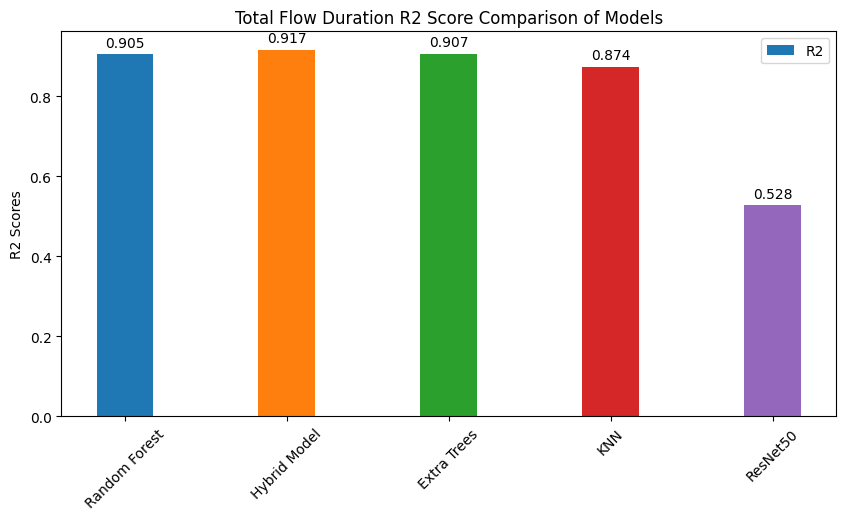

In [162]:
# Model names and R2 scores
models = ['Random Forest', 'Hybrid Model', 'Extra Trees', 'KNN', 'ResNet50']
r2_scores = [r2_rf1, r2_va, r2_et1, r2_knn1, r2_val1]

# Calculate positions for the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Different colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(x, r2_scores, width, color=colors, label='R2')

# Labeling and aesthetics
ax.set_ylabel('R2 Scores')
ax.set_title('Total Flow Duration R2 Score Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Adding individual R2 score values on top of each bar
for rect, r2 in zip(rects, r2_scores):
    height = rect.get_height()
    ax.annotate(f'{r2:.3f}',  # Format the value to three decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


## 2. Total Packet Count Prediction

### Spliting data into training and testing sets

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# create a 'total_packet_count' column
data['total_packet_count'] = data['src_pkts'] + data['dst_pkts']

# Features and Target
X = data[['src_pkts', 'src_ip_bytes', 'dst_pkts']]
y = data['total_packet_count']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### i). KNeighborsRegressor

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Initialize and train the KNN model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Evaluation metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [167]:
# Print each metric in steps
print("KNN Regression Evaluation Metrics:")
print("R-squared (R2):", format(r2_knn, ".3f"))
print("Mean Squared Error (MSE):", format(mse_knn, ".3f"))
print("Root Mean Squared Error (RMSE):", format(rmse_knn, ".3f"))
print("Mean Absolute Error (MAE):", format(mae_knn, ".3f"))

KNN Regression Evaluation Metrics:
R-squared (R2): 0.958
Mean Squared Error (MSE): 0.041
Root Mean Squared Error (RMSE): 0.201
Mean Absolute Error (MAE): 0.020


### ii). RandomForestRegressor

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Default settings
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [170]:
# Print each metric in steps
print("Random Forest Evaluation Metrics:")
print("R-squared (R2):", format(r2_rf, ".3f"))
print("Mean Squared Error (MSE):", format(mse_rf, ".3f"))
print("Root Mean Squared Error (RMSE):", format(rmse_rf, ".3f"))
print("Mean Absolute Error (MAE):", format(mae_rf, ".3f"))

Random Forest Evaluation Metrics:
R-squared (R2): 0.818
Mean Squared Error (MSE): 0.173
Root Mean Squared Error (RMSE): 0.416
Mean Absolute Error (MAE): 0.020


### iii). ExtraTreesRegressor

In [172]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Initialize and train the Extra Trees model
et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train_scaled, y_train)
y_pred_et = et_reg.predict(X_test)

# Evaluation metrics
mse_et = mean_squared_error(y_test, y_pred_et)
mae_et = mean_absolute_error(y_test, y_pred_et)
rmse_et = np.sqrt(mse_et)
r2_et = r2_score(y_test, y_pred_et)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [173]:
# Print each metric in steps
print("ExtraTreesRegressor Evaluation Metrics:")
print("R-squared (R2):", format(r2_et, ".3f"))
print("Mean Squared Error (MSE):", format(mse_et, ".3f"))
print("Root Mean Squared Error (RMSE):", format(rmse_et, ".3f"))
print("Mean Absolute Error (MAE):", format(mae_et, ".3f"))

ExtraTreesRegressor Evaluation Metrics:
R-squared (R2): 0.996
Mean Squared Error (MSE): 0.004
Root Mean Squared Error (RMSE): 0.064
Mean Absolute Error (MAE): 0.015


### iv). ResNet

In [175]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and include validation split
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predict on training and validation data
y_pred_train = model.predict(X_train_scaled)
y_pred_val = model.predict(X_train_scaled[-int(len(X_train_scaled) * 0.2):])  # Assuming last 20% is validation

# Calculate R2 scores
r2_train = r2_score(y_train, y_pred_train)
resnet_r2_val = r2_score(y_train[-int(len(y_train) * 0.2):], y_pred_val)

# Calculate MSE and MAE
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_train[-int(len(y_train) * 0.2):], y_pred_val)
mae_val = mean_absolute_error(y_train[-int(len(y_train) * 0.2):], y_pred_val)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2979/2979 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1583 - mae: 0.0501 - val_loss: 0.0155 - val_mae: 0.0166
Epoch 2/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5152 - mae: 0.0536 - val_loss: 0.5003 - val_mae: 0.0243
Epoch 3/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.4624 - mae: 0.0581 - val_loss: 0.0041 - val_mae: 0.0130
Epoch 4/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1003 - mae: 0.0377 - val_loss: 0.4617 - val_mae: 0.1038
Epoch 5/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3619 - mae: 0.0527 - val_loss: 0.2342 - val_mae: 0.1282
Epoch 6/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.6315 - mae: 0.0453 - val_loss: 0.0366 - val_mae: 0.1597
Epoch 7/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2890 - mae: 0.0387 - val_loss: 0.0604 - val_mae: 0.1670
Epoch 8/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1754 - mae: 0.0255 - val_loss: 0.1036 - val_mae: 0.1683
Epoch 9/10
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 10s 2m

In [176]:
# Calculate RMSE if not already done
rmse_val = np.sqrt(mse_val)

# Print the evaluation metrics
print("ResNet Evaluation Metrics")
print(f"R2 Score: {resnet_r2_val:.3f}")
print(f"MSE: {mse_val:.3f}")
print(f"MAE: {mae_val:.3f}")
print(f"RMSE: {rmse_val:.3f}")

ResNet Evaluation Metrics
R2 Score: 0.864
MSE: 0.231
MAE: 0.170
RMSE: 0.481


### v).Hybrid Model (Random Forest + Extra Trees)

In [178]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For demonstration, let's pretend we're splitting the data again for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the models
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
extra_trees.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred_extra_trees = extra_trees.predict(X_val_scaled)
y_pred_random_forest = random_forest.predict(X_val_scaled)

# Combine predictions (average them)
y_pred_hybrid = (y_pred_extra_trees + y_pred_random_forest) / 2

# Calculate metrics for the hybrid model
r2_val = r2_score(y_val, y_pred_hybrid)
mse_val = mean_squared_error(y_val, y_pred_hybrid)
mae_val = mean_absolute_error(y_val, y_pred_hybrid)

In [179]:
# Calculate RMSE if not already done
rmse_val = np.sqrt(mse_val)

# Print the evaluation metrics
print("Hybrid Model Evaluation Metrics")
print(f"R2 Score: {r2_val:.3f}")
print(f"MSE: {mse_val:.3f}")
print(f"MAE: {mae_val:.3f}")
print(f"RMSE: {rmse_val:.3f}")

Hybrid Model Evaluation Metrics
R2 Score: 0.997
MSE: 0.006
MAE: 0.001
RMSE: 0.075


### vi). Models R2 Comparison for Total Packet Count

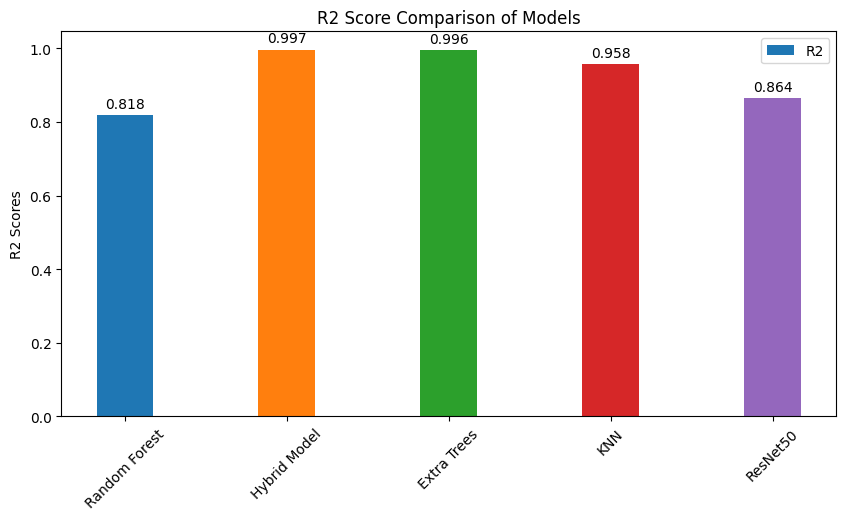

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and R2 scores
models = ['Random Forest', 'Hybrid Model', 'Extra Trees', 'KNN', 'ResNet50']
r2_scores = [r2_rf, r2_val, r2_et, r2_knn, resnet_r2_val]  # Updated R2 scores list

# Calculate positions for the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Different colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(x, r2_scores, width, color=colors, label='R2')

# Labeling and aesthetics
ax.set_ylabel('R2 Scores')
ax.set_title('R2 Score Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Adding individual R2 score values on top of each bar
for rect, r2 in zip(rects, r2_scores):
    height = rect.get_height()
    ax.annotate(f'{r2:.3f}',  # Format the value to three decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
